# Notebook activity

```{attention}
この講義では、受講者の操作を記録し、授業進行の指標として参照します。
そのためノートブックの最初に次のセルを追加しています。
ノートブックを読み込んだときに、これらのセルが自動実行されるように付加情報を埋め込んでいます。
ひとつ前に行ったセキュリティの設定で、今読み込んだノートブックは "Trusted" 状態になっているはずなので、
改めて初期化用のセルを実行する必要は無いはずです。
```

In [1]:
import os

from datetime import date
from datetime import time
from datetime import datetime as dt

def logfile(user=os.environ.get('JUPYTERHUB_USER') or 'jovyan'):
    prefix='/srv'
    if os.path.isdir(prefix) and os.access(prefix, os.W_OK):
        prefix+=('/'+user)
        if not os.path.isdir(prefix):
            os.makedirs(prefix)
    else:
        prefix='.'
    return prefix+'/'+dt.now().strftime('%Y%m%d')+'.log'

path=logfile()
%logstop
%logstart -otq $path
#%logstate

```{attention}
この操作記録を次のように可視化します。
```

In [4]:
import pandas as pd
import numpy as np

def activity(user=os.environ.get('JUPYTERHUB_USER') or 'jovyan'):
    ds = np.empty(0)
    try:
        with open(logfile(user), 'r') as f:
            for line in f:
                try:
                    d = dt.strptime(line, "# %a, %d %b %Y %H:%M:%S ")
                    ds = np.append(ds,pd.Timestamp(d))
                except:
                    pass
        return pd.Series(np.ones(len(ds)), ds)
    except:
        pass

from matplotlib import pyplot as plt
import seaborn as sns

sns.set()

def plot_ax(ax, user=os.environ.get('JUPYTERHUB_USER') or 'jovyan'):
    sns.scatterplot(ax=ax, data = activity(user), alpha=0.2, s=1000, edgecolor='none')
    ax.set_ylabel(user, rotation=0, ha="right", va="center")

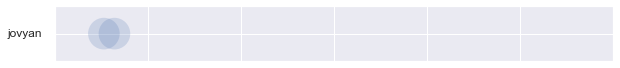

In [5]:
# single user
fig = plt.figure(figsize=(10,1))
ax = fig.add_subplot(1,1,1)

plt.setp(ax, xlim=(pd.Timestamp(dt.combine(date.today(),time(dt.now().hour,))), pd.Timestamp(dt.combine(date.today(),time(dt.now().hour,59,59)))))
plt.setp(ax, ylim=(0,2))
plt.setp(ax, xticklabels=[])
plt.setp(ax, yticklabels=[])

plot_ax(ax)